<img src ="./images/RSLab_logo.jpg" align = "left" width = "19%"> 
<img src ="./images/mago.png" align = "right" width = "10%"> 

**Authors:** Alekos Falagas 

**Copyright:** 2023 Alekos Falagas

**License:** GPLv3

<div class="alert alert-block alert-success">
<h3>Crop Type Mapping Application: A case study over Boucharray Irrigated District, Cap Bon, Tunisia, 2022</h3></div>

# Introduction

## ```cropmaps``` python package

MAGO ```cropmaps``` package is an open source Python toolbox for crop type mapping
from Sentinel-2 L2A multispectral satellite data using two well known machine learning
algorithms; SVM and Random Forest. The core software is exploits OOP programming concepts as showed in the flowchart bellow.

<figure>
<img src ="./images/flowchart.drawio.png" align = "center" width = "70%"> 
<figcaption> Image 1: Flowchart of cropmaps package.</figcaption>
</figure>
 
## Data used

| Product Name | Description | Type | Usage |
|:--------------------:|:-----------------:|:-----------------:|:-----------------:|
| Sentinel-2 | The Copernicus Sentinel-2 mission comprises a constellation of two polar-orbiting satellites placed in the same sun-synchronous orbit, phased at 180° to each other. It aims at monitoring variability in land surface conditions, and its wide swath width and high revisit time will support monitoring of Earth's surface changes. | Raster | Core dataset for ML application |
| Ground Truth | Ground truth data collected by INGREF over the region of Boucharray Irrigated District, Cap Bon, Tunisia refering to cultivation season of 2022. | Vector | Core dataset for ML application | 

# Quickstart

## Importing Python dependencies

In [1]:
import os
import numpy as np
import rasterio
from datetime import datetime, timedelta
from cropmaps.sts import sentimeseries
from cropmaps.get_creodias import get_data, check_L2, eodata_path_creator


## User required information

User must define for the software:

- A path to an area of interest (AOI) must be defined by the user for the software to be able to search for data in a specific region.
The path must be provided in Python as a ```str```.
- ESA-Scihub credentials are required in order to perform requests to ESA while searching for data. If you do not
have you can create an account here. ESA-Scihub credentials
must be provided in Python as a str.
- At last, a search/work time slot must be provided by the user. The date format is YYYYMMDD
and provided in Python as a str.

For all the above see the following Python lines:

In [2]:
AOI = "/home/eouser/vol1/crop-type-mapping/Cap_Bon_2/AOI/AOI.geojson"

user = "mago.creodias"
password = "TESTing.11"
start_date = "20210901"
end_date = "20220930"
relative_orbit = 122

## Get data

The first step in order to find all the available Sentinel-2 data is to use the above variables (```user, password, start_date, end_date```) to get as a ```Pandas DataFrame``` all the Sentinel-2 catalog. In the example bellow only two query variables are used, ```producttype``` set to ```S2MSI2A``` and ```relativeorbitnumber``` is set to 122.

> :memo: User can define more variables for a more specific query. These variables can be found [here](https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/FullTextSearch?redirectedfrom=SciHubUserGuide.3FullTextSearch).

Since in this scenario we are searching for the clearest image for each month the following lines of code will return the start and end date for each month and by using these dates multiple requests to ESA servers will be done to get the information.

In [3]:
def get_start_end_dates(start_date: datetime, end_date: datetime)->tuple:
    """
    Given a start date and end date, returns the start and end dates of each full month in the range in the format "YYYYMMDD".

    Args:
    start_date (datetime): The start date of the range.
    end_date (datetime): The end date of the range.

    Returns:
    tuple: A tuple of two lists, one containing the start dates of each full month in the range, and one containing the end dates of each full month in the range. Both lists are in the format "YYYYMMDD".

    """
    start_dates = []  # list to store the start dates of each month
    end_dates = []  # list to store the end dates of each month

    current_date = start_date.replace(day=1)  # set the current date to the first day of the first month

    # iterate through each month in the range
    while current_date <= end_date:
        month_start = current_date
        month_end = (current_date + timedelta(days=31)).replace(day=1) - timedelta(days=1)  # calculate the end date of the current month

        # add the start and end dates of the current month to the start_dates and end_dates lists
        start_dates.append(month_start.strftime("%Y%m%d"))
        end_dates.append(month_end.strftime("%Y%m%d"))

        # set the current date to the first day of the next month
        current_date = month_end + timedelta(days=1)

    return start_dates, end_dates

# Create a balanced dataset with one image for each month
# We will select the clearest cloud covered image each time
sd = (int(start_date[:4]), int(start_date[4:6]), int(start_date[6:]))
ed = (int(end_date[:4]), int(end_date[4:6]), int(end_date[6:]))
start_date = datetime(sd[0], sd[1], sd[2])
end_date = datetime(ed[0], ed[1], ed[2])
start_dates, end_dates = get_start_end_dates(start_date, end_date)
creodias_paths = []
for start, end in zip(start_dates, end_dates):
    data = get_data(AOI, start, end, user, password, producttype = "S2MSI2A", relativeorbitnumber = relative_orbit)
    data = check_L2(data)
    data = data[data["cloudcoverpercentage"] == data["cloudcoverpercentage"].min()]
    creodias_paths.append(eodata_path_creator(data)[0])

creodias_paths

2023-02-21 09:14:39 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 6 products
2023-02-21 09:14:39 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 6 products
2023-02-21 09:14:40 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 7 products
2023-02-21 09:14:40 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 6 products
2023-02-21 09:14:40 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 7 products
2023-02-21 09:14:40 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 5 products
2023-02-21 09:14:40 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 6 products
2023-02-21 09:14:41 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 5 products
2023-02-21 09:14:42 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 6 products
2023-02-21 09:14:42 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 6 products
2023-02-21 09:14:42 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 6 products
2023-02-21 09:14:42 mago-1 sentinelsat.SentinelAPI[25723] INFO Found 6 products
2023-02-21 09:14:42 mago-1 sentinelsat.S

['/eodata/Sentinel-2/MSI/L2A/2021/09/07/S2A_MSIL2A_20210907T100031_N0301_R122_T32SPF_20210907T113751.SAFE',
 '/eodata/Sentinel-2/MSI/L2A/2021/10/12/S2B_MSIL2A_20211012T100029_N0301_R122_T32SPF_20211012T130322.SAFE',
 '/eodata/Sentinel-2/MSI/L2A/2021/11/11/S2B_MSIL2A_20211111T100149_N0301_R122_T32SPF_20211111T121500.SAFE',
 '/eodata/Sentinel-2/MSI/L2A/2021/12/01/S2B_MSIL2A_20211201T100259_N0301_R122_T32SPF_20211201T114730.SAFE',
 '/eodata/Sentinel-2/MSI/L2A/2022/01/30/S2B_MSIL2A_20220130T100139_N0400_R122_T32SPF_20220130T131733.SAFE',
 '/eodata/Sentinel-2/MSI/L2A/2022/02/09/S2B_MSIL2A_20220209T100049_N0400_R122_T32SPF_20220209T132019.SAFE',
 '/eodata/Sentinel-2/MSI/L2A/2022/03/01/S2B_MSIL2A_20220301T100029_N0400_R122_T32SPF_20220301T132405.SAFE',
 '/eodata/Sentinel-2/MSI/L2A/2022/04/25/S2A_MSIL2A_20220425T100031_N0400_R122_T32SPF_20220425T125451.SAFE',
 '/eodata/Sentinel-2/MSI/L2A/2022/05/20/S2B_MSIL2A_20220520T100029_N0400_R122_T32SPF_20220520T115210.SAFE',
 '/eodata/Sentinel-2/MSI/L2A

## Create CreoDIAS local storage structure

All the available data in CreoDIAS are stored in ```/eodata```
folder. Users do not have editing/writing permissions in that specific folder. So the user have to use the following lines of code to create a local folder to store the results of the procedure that will follow.
Note that the original data will not be copied in user's local folder but only new products such as NDVI, or masked images will only be saved there.

In [4]:
# Reproducing a DIAS enviroment where we can not write inside the data folder from the moment we have the data
# This step is required because there are no permissions to write inside the /eodata DIAS folder
products_path = "/home/eouser/vol1/crop-type-mapping/Cap_Bon_2/eodata_local"
if not os.path.exists(products_path):
    os.makedirs(products_path)

To get the data in Python the user has to use ```find_DIAS()``` method and the ```creodias_paths``` variable from the above steps. Method find_DIAS() is part of cropmaps.sts.sentimeseries class which is responsible to collect, process and analyze Sentinel-2 timeseries data. For more information see [here](under construction).

In [5]:
# Create a timeseries with all the available data from query
eodata = sentimeseries("S2-timeseries")
eodata.find_DIAS(creodias_paths)
eodata.sort_images(date=True)

09:14 - 34 - INFO - cropmaps.sts - Reading image S2A_MSIL2A_20210907T100031_N0301_R122_T32SPF_20210907T113751.SAFE...
09:14 - 81 - INFO - cropmaps.sentinels - Parsing Image Metadata file...
09:14 - 93 - INFO - cropmaps.sentinels - Done!
09:14 - 102 - INFO - cropmaps.sentinels - Parsing Tile Metadata file...
09:14 - 105 - INFO - cropmaps.sentinels - Done!
09:14 - 34 - INFO - cropmaps.sts - Reading image S2B_MSIL2A_20211012T100029_N0301_R122_T32SPF_20211012T130322.SAFE...
09:14 - 81 - INFO - cropmaps.sentinels - Parsing Image Metadata file...
09:14 - 93 - INFO - cropmaps.sentinels - Done!
09:14 - 102 - INFO - cropmaps.sentinels - Parsing Tile Metadata file...
09:14 - 105 - INFO - cropmaps.sentinels - Done!
09:14 - 34 - INFO - cropmaps.sts - Reading image S2B_MSIL2A_20211111T100149_N0301_R122_T32SPF_20211111T121500.SAFE...
09:14 - 81 - INFO - cropmaps.sentinels - Parsing Image Metadata file...
09:14 - 93 - INFO - cropmaps.sentinels - Done!
09:14 - 102 - INFO - cropmaps.sentinels - Parsing

In [6]:
print("Objects:")
print(eodata.data)
print("Dates:")
print(eodata.dates)
print("Cloud Cover:")
print(eodata.cloud_cover)

Objects:
[<cropmaps.sentinels.sentinel2 object at 0x7f885e2d39b0>, <cropmaps.sentinels.sentinel2 object at 0x7f8898a9ea90>, <cropmaps.sentinels.sentinel2 object at 0x7f8894998f28>, <cropmaps.sentinels.sentinel2 object at 0x7f885e26afd0>, <cropmaps.sentinels.sentinel2 object at 0x7f885e2d3390>, <cropmaps.sentinels.sentinel2 object at 0x7f885e298dd8>, <cropmaps.sentinels.sentinel2 object at 0x7f885e2d3c88>, <cropmaps.sentinels.sentinel2 object at 0x7f885dc10470>, <cropmaps.sentinels.sentinel2 object at 0x7f885dbab2b0>, <cropmaps.sentinels.sentinel2 object at 0x7f885dc10b38>, <cropmaps.sentinels.sentinel2 object at 0x7f889820def0>, <cropmaps.sentinels.sentinel2 object at 0x7f886c21f0b8>, <cropmaps.sentinels.sentinel2 object at 0x7f885db6e898>]
Dates:
[datetime.datetime(2021, 9, 7, 10, 0, 31, 24000), datetime.datetime(2021, 10, 12, 10, 0, 29, 24000), datetime.datetime(2021, 11, 11, 10, 1, 49, 24000), datetime.datetime(2021, 12, 1, 10, 2, 59, 24000), datetime.datetime(2022, 1, 30, 10, 1, 39

### Masking data using AOI file

In this example the region of interest is a cover a smaller geographical region than the available Sentinel-2 data. To save disk space and computational time, raw data must be masked to the geographical cover of the AOI. Also, it is important to have all the raster data in the same spatial resolution and for that in the example bellow the highest possible resolution of 10 meters for Sentinel-2 was selected.

| Band | Resolution (m) | Resize | Final Resolution |
|------|----------------|--------|------------------|
| 02   | 10             | False  | 10               |
| 03   | 10             | False  | 10               |
| 04   | 10             | False  | 10               |
| 05   | 20             | True   | 10               |
| 06   | 20             | True   | 10               |
| 07   | 20             | True   | 10               |
| 08   | 10             | False  | 10               |
| 8A   | 20             | True   | 10               |
| 11   | 20             | True   | 10               |
| 12   | 20             | True   | 10               |
-----------------------------------------------------
Table 1: Bands with their respective raw spatial resolution and the final spatial resolution

In [7]:
# Mask the data and resize them to 10m resolution to match the highest possible resolution
eodata.clipbyMask(shapefile = AOI, store = products_path) # Raw Clipping
eodata.clipbyMask(shapefile = AOI, store = products_path, resize = True) # Resize 20m to 10m

09:16 - 160 - INFO - cropmaps.sts - Masking all time series with /home/eouser/vol1/crop-type-mapping/Cap_Bon_2/AOI/AOI.geojson...
09:16 - 91 - WARNING - cropmaps.clipper - File /home/eouser/vol1/crop-type-mapping/Cap_Bon_2/eodata_local/Sentinel-2/L2A/2021/09/07/S2A_MSIL2A_20210907T100031_N0301_R122_T32SPF_20210907T113751.SAFE/T32SPF_20210907T100031_B02_10_AOI.tif already exists...
09:16 - 91 - WARNING - cropmaps.clipper - File /home/eouser/vol1/crop-type-mapping/Cap_Bon_2/eodata_local/Sentinel-2/L2A/2021/09/07/S2A_MSIL2A_20210907T100031_N0301_R122_T32SPF_20210907T113751.SAFE/T32SPF_20210907T100031_B03_10_AOI.tif already exists...
09:16 - 91 - WARNING - cropmaps.clipper - File /home/eouser/vol1/crop-type-mapping/Cap_Bon_2/eodata_local/Sentinel-2/L2A/2021/09/07/S2A_MSIL2A_20210907T100031_N0301_R122_T32SPF_20210907T113751.SAFE/T32SPF_20210907T100031_B04_10_AOI.tif already exists...
09:16 - 91 - WARNING - cropmaps.clipper - File /home/eouser/vol1/crop-type-mapping/Cap_Bon_2/eodata_local/Se

## Calculate Vegetation and RS Indices

For the crop type mapping with remote sensing data is important the use of vegetation/RS indices. Currently, the software supports the calculation of 3 indices: NDVI, NDWI and NDBI. NDVI and NDWI raw spatial resolutions are 10 meters, while NDBI's raw spatial resolution is 20 meters. In NDBI's case upsampling procedure must be performed to match the required spatial resolution of 10 meters. 


In [8]:
# Calculate vegetation indexes
eodata.getVI("NDVI", store = products_path, subregion = "AOI") # Subregion is the name of the mask shapefile
eodata.getVI("NDWI", store = products_path, subregion = "AOI")
eodata.getVI("NDBI", store = products_path, subregion = "AOI")

# Do the same for the vegetation indexes
# NOTE: CLIPPED DATA BY DEFAULT ARE SAVED AS AN ATTRIBUTE OF THE S2IMAGE OBJECT AS image.BAND[RESOLUTION][MASK_NAME]
# SO IN THIS CASE TO ACCESS THE ATTRIBUTE OF IMAGE 0, BAND B12 YOU CAN write: eodata.data[0].B12["10"]["AOI"] 
eodata.upsample(store = products_path, band = "NDBI", subregion = "AOI")

09:16 - 129 - INFO - cropmaps.sts - Calculating NDVI for all time series...
09:16 - 360 - WARNING - cropmaps.sentinels - File /home/eouser/vol1/crop-type-mapping/Cap_Bon_2/eodata_local/Sentinel-2/L2A/2021/09/07/S2A_MSIL2A_20210907T100031_N0301_R122_T32SPF_20210907T113751.SAFE/T32SPF_20210907T100031_NDVI_10_AOI.tif already exists...
09:16 - 360 - WARNING - cropmaps.sentinels - File /home/eouser/vol1/crop-type-mapping/Cap_Bon_2/eodata_local/Sentinel-2/L2A/2021/10/12/S2B_MSIL2A_20211012T100029_N0301_R122_T32SPF_20211012T130322.SAFE/T32SPF_20211012T100029_NDVI_10_AOI.tif already exists...
09:16 - 360 - WARNING - cropmaps.sentinels - File /home/eouser/vol1/crop-type-mapping/Cap_Bon_2/eodata_local/Sentinel-2/L2A/2021/11/11/S2B_MSIL2A_20211111T100149_N0301_R122_T32SPF_20211111T121500.SAFE/T32SPF_20211111T100149_NDVI_10_AOI.tif already exists...
09:16 - 360 - WARNING - cropmaps.sentinels - File /home/eouser/vol1/crop-type-mapping/Cap_Bon_2/eodata_local/Sentinel-2/L2A/2021/12/01/S2B_MSIL2A_2021

## Training/Predicting ML-model for crop type mapping using Sentinel-2 timeseries data

### Importing required Python packages


In [9]:
from cropmaps.cube import generate_cube_paths, make_cube
from cropmaps.models import random_forest_train, random_forest_predict, save_model, LandCover_Masking
from cropmaps.prepare_vector import burn

### Creating hypercube for training

The first step for making the training hypercube is the selection of bands to be included. Note that all the available dates of the ```eodata (sentimeseries object)``` will be used. Then the use of ```generate_cube_paths()``` method is used to provide all tha data paths of the images to be stacked. At last the user must provide a hypercube name and call the ```make_cube()``` method to create and save the hypercube.


In [10]:
# Get the paths of all available data for making the cube
bands = ["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12", "NDVI", "NDWI", "NDBI"]
paths = generate_cube_paths(eodata, bands, mask = "AOI")

# Create the cube
cube_name = "cube"
cube_path = make_cube(paths, products_path, cube_name, dtype = np.float32)

### Prepare Ground Truth (GT) data for training/testing

First let's explore the data.

In [11]:
import geopandas
import folium
from branca.element import Template, MacroElement
shapefile = "/home/eouser/vol1/crop-type-mapping/Cap_Bon_2/Ground_Truth/GT_data_selected_balanced_buffered.shp" # Shapefile of the vector training data

gt_data = geopandas.read_file(shapefile)
print(gt_data.head())
# Create a map located to the AOI
m = folium.Map(location=[gt_data.centroid.y[0], gt_data.centroid.x[0]], tiles="openstreetmap", zoom_start=13)
folium.TileLayer('openstreetmap').add_to(m)

def style_fn(x):
    return {"color":"blue", "weight":3}

geo = folium.GeoJson(gt_data).add_to(m)

m

     id     Crop                                           geometry
0  None    Apple  POLYGON ((10.52078 36.64183, 10.52170 36.64228...
1  None    Apple  POLYGON ((10.53559 36.64457, 10.53617 36.64487...
2  None    Apple  POLYGON ((10.53283 36.64675, 10.53435 36.64750...
3  None    Apple  POLYGON ((10.51674 36.66840, 10.51681 36.66844...
4  None  Apricot  POLYGON ((10.52287 36.66381, 10.52368 36.66423...


/home/eouser/uth/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':
/home/eouser/uth/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':


For the training/testing of the model GT data must be used. The raw format of the GT data must be in ESRI Shapefile.
Any valid Coordinates Reference System (CRS) can be used on that data. User must provide a ```shapefile``` variable with the path to the data and the respective class column.
The data then must be converted from vector to raster. For that, user must provide metadata, such as CRS, transform, pixel size etc as a Python `dict`.
These type of information can be extracted by copying the metadata information of any NDVI image as in the example bellow.

> :warning: The spatial resolution of the GT raster must be the same with the spatial resolution of the hypercube!

The last step is the usage of ```burn()``` method to write the GT data as an image with the same metadata as the cube. 

In [12]:
# Prepare training ground truth data
classes = "Crop" # Name of the column with the crops
base_path = eodata.data[0].NDVI["10"]["AOI"] # Path of a base image to burn
metadata = rasterio.open(base_path).meta.copy() # Copy metadata dictionary to save the image using the same CRS, transform, shape etc
gt_data_raster = burn(shapefile, classes, metadata) # Save the ground truth data as raster

/home/eouser/uth/venv/lib/python3.6/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape None at index 546 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/eouser/uth/venv/lib/python3.6/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape None at index 547 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/eouser/uth/venv/lib/python3.6/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape None at index 548 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/eouser/uth/venv/lib/python3.6/site-packages/rasterio/features.py:318: ShapeSkipWarning: Invalid or empty shape None at index 551 will not be rasterized.
  warni

### Training ML-model

For the training of the model ```random_forest_train``` method is being used by providing the hypercube path, the GT raster data path and a path to store the results. By default the 70% of the available GT data is used for the training of the model and 30% for testing. Also the user can save the model as in the example bellow using the ```save_model()``` method. 


In [13]:
# Train the model using the cube and the burned raster image with the ground truth data
model = random_forest_train(cube_path = cube_path,
    gt_fpath = gt_data_raster, 
    results_to = "/home/eouser/vol1/crop-type-mapping/Cap_Bon_2/")


09:16 - 182 - INFO - cropmaps.models - Cube matrix size: (169, 1487, 1891)
09:16 - 183 - INFO - cropmaps.models - GT matrix size: (1487, 1891)
09:16 - 184 - INFO - cropmaps.models - Number of samples: 67133, 2.39% of total area in the image.
09:16 - 185 - INFO - cropmaps.models - The training data include 25 classes.
09:19 - 209 - INFO - cropmaps.models - OOB prediction of accuracy is: 98.59%


In [14]:
predicted = random_forest_predict(cube_path = cube_path, model = model, results_to = "/home/eouser/vol1/crop-type-mapping/Cap_Bon_2/") # Use the model to predict over the cube

landcover_data = "/home/eouser/vol1/crop-type-mapping/Cap_Bon_2/LandCover" # Path to store LandCover data
landcover_image = eodata.LandCover(store = landcover_data) # Download ESA worldcover data

predicted = LandCover_Masking(landcover_image, predicted, results_to = "/home/eouser/vol1/crop-type-mapping/Cap_Bon_2/") # Mask the result using the third party LandCover product


/home/eouser/uth/venv/lib/python3.6/site-packages/pandas/core/series.py:3852: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  values, counts = reshape.explode(np.asarray(self.array))
/home/eouser/uth/venv/lib/python3.6/site-packages/pandas/core/series.py:3852: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  values, counts = reshape.explode(np.asarray(self.array))
09:29 - 19 - INFO - cropmaps.utils - Getting ESA WorldCover information...


  0%|          | 0/1 [00:00<?, ?it/s]

09:29 - 35 - INFO - cropmaps.utils - Done.


## Ploting the results

/home/eouser/uth/venv/lib/python3.6/site-packages/ipykernel_launcher.py:144: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/home/eouser/uth/venv/lib/python3.6/site-packages/ipykernel_launcher.py:144: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




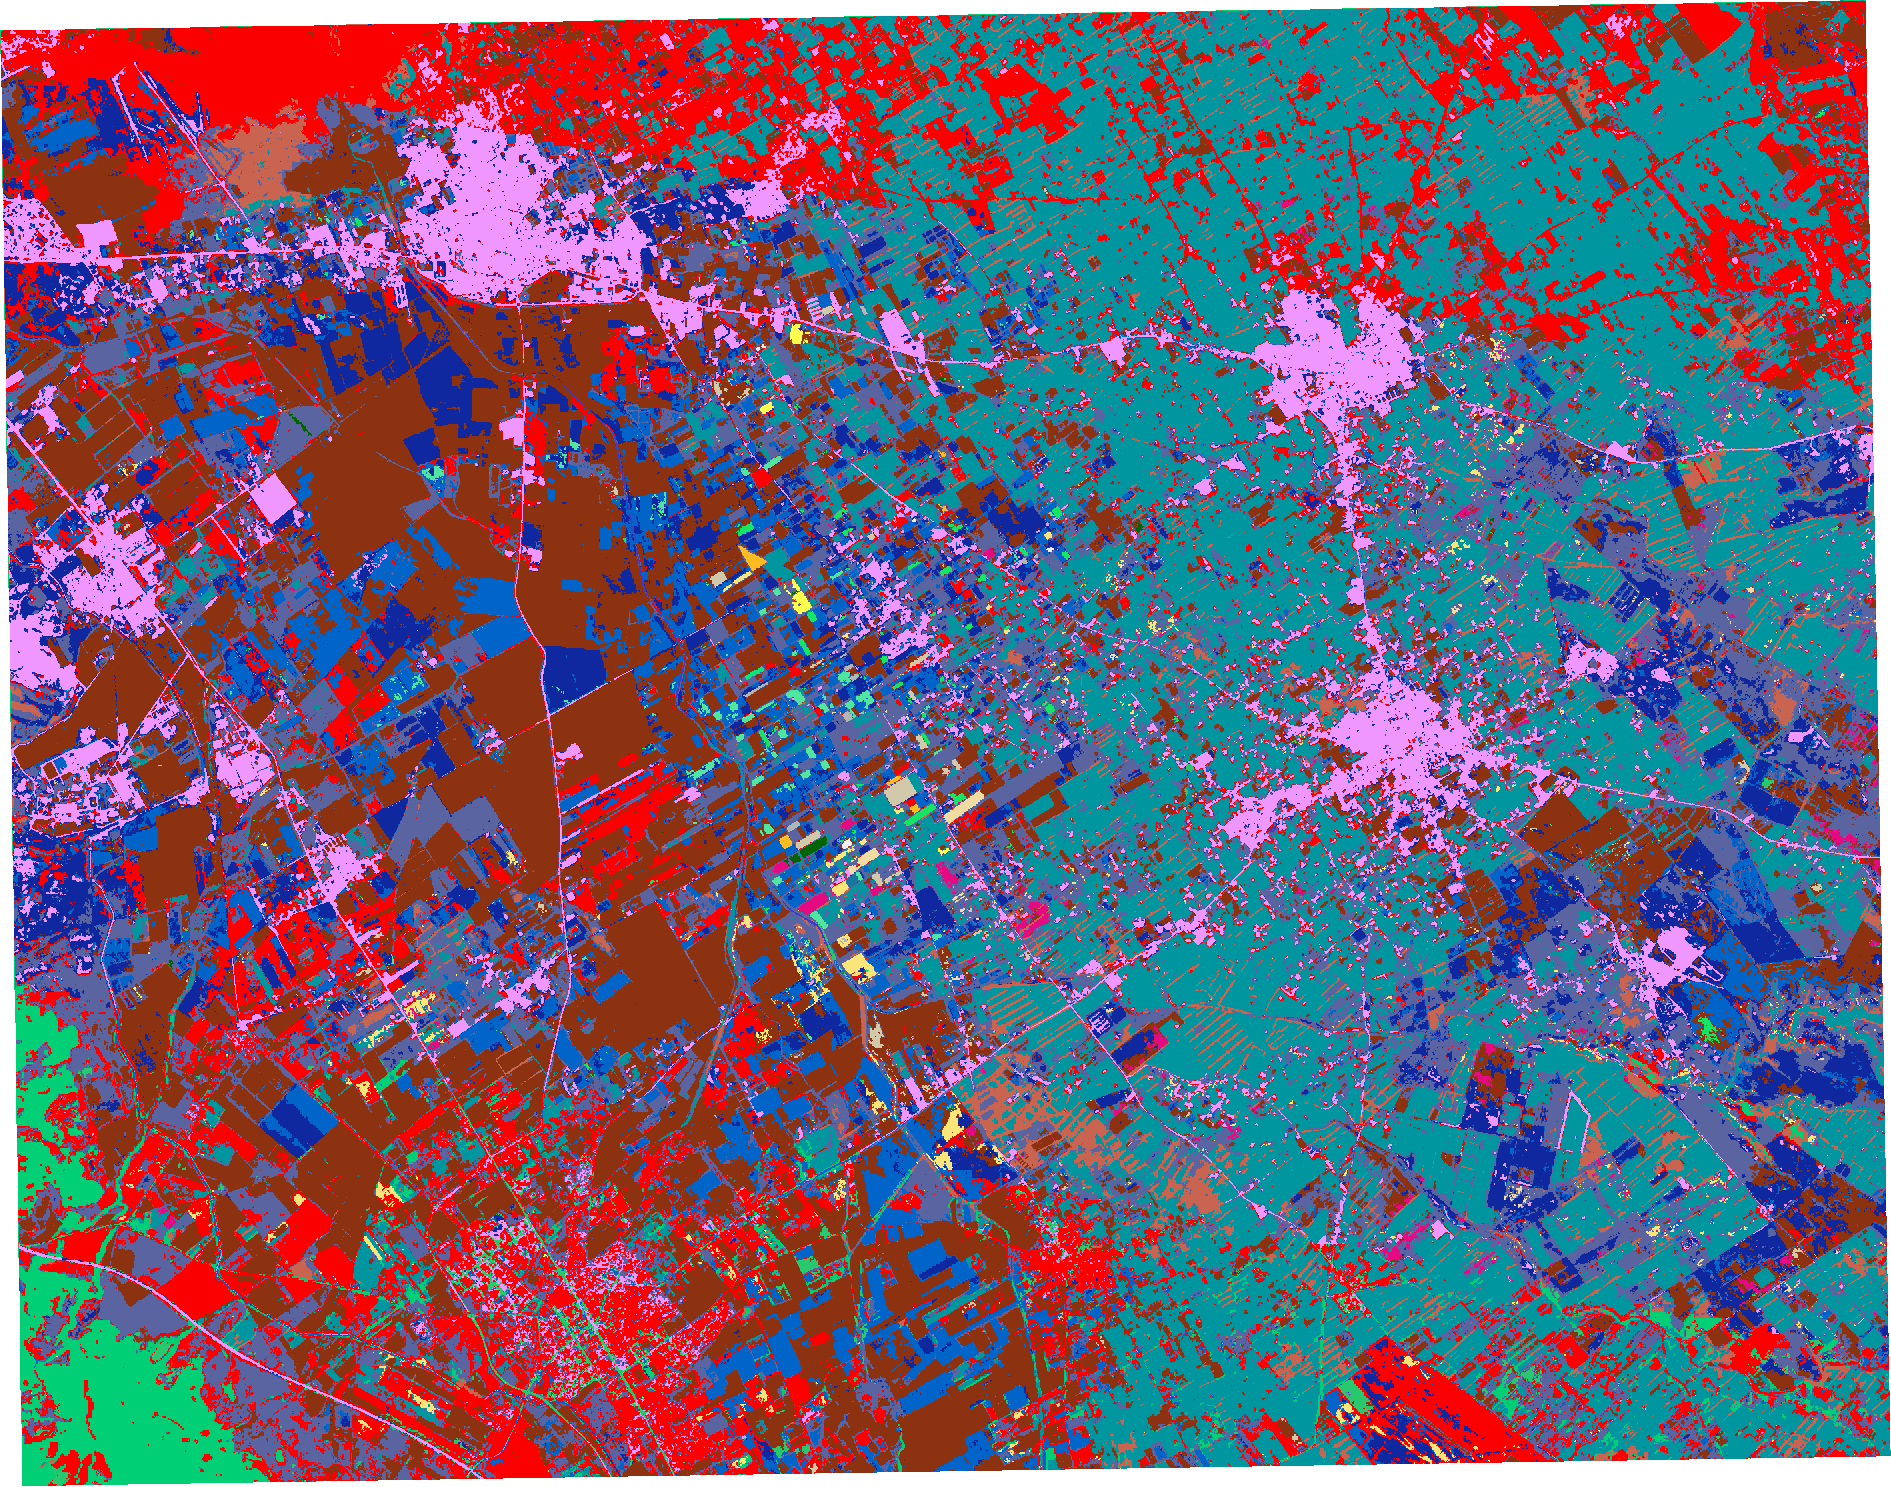

In [15]:
def get_folium_categorical_template():
    template = """
    {% macro html(this, kwargs) %}
    <!doctype html>
    <html lang="en">
    <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>jQuery UI Draggable - Default functionality</title>
    <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
    <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
    <script>
    $( function() {
      $( "#maplegend" ).draggable({
                      start: function (event, ui) {
                          $(this).css({
                              right: "auto",
                              top: "auto",
                              bottom: "auto"
                          });
                      }
                  });
    });
    </script>
    </head>
    <body>
    <div id='maplegend' class='maplegend' 
      style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
       border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
    <div class='legend-title'>Classification Categories</div>
    <div class='legend-scale'>
    <ul class='legend-labels'>
      <li><span style='background:rgb(0, 0, 0); opacity:1;'></span><b>No data</b></li>
      <li><span style='background:rgb(0, 100, 0); opacity:1;'></span><b>Almond</b></li>
      <li><span style='background:rgb(255, 187, 34); opacity:1;'></span><b>Apple</b></li>
      <li><span style='background:rgb(255, 255, 76); opacity:1;'></span><b>Apricot</b></li>
      <li><span style='background:rgb(240, 150, 255); opacity:1;'></span><b>Artificial Surfaces</b></li>
      <li><span style='background:rgb(250, 0, 0); opacity:1;'></span><b>Bare soil</b></li>
      <li><span style='background:rgb(180, 180, 180); opacity:1;'></span><b>Beans</b></li>
      <li><span style='background:rgb(240, 240, 240); opacity:1;'></span><b>Beet</b></li>
      <li><span style='background:rgb(0, 100, 200); opacity:1;'></span><b>Carrot</b></li>
      <li><span style='background:rgb(0, 150, 160); opacity:1;'></span><b>Citrus</b></li>
      <li><span style='background:rgb(0, 207, 117); opacity:1;'></span><b>Forest</b></li>
      <li><span style='background:rgb(240, 220, 160); opacity:1;'></span><b>Grapevine</b></li>
      <li><span style='background:rgb(250, 230, 120); opacity:1;'></span><b>Grenade</b></li>
      <li><span style='background:rgb(210, 200, 170); opacity:1;'></span><b>Lawns</b></li>
      <li><span style='background:rgb(90, 100, 160); opacity:1;'></span><b>Olive</b></li>
      <li><span style='background:rgb(80, 230, 160); opacity:1;'></span><b>Onion</b></li>
      <li><span style='background:rgb(40, 200, 110); opacity:1;'></span><b>Other vegetation</b></li>
      <li><span style='background:rgb(10, 230, 120); opacity:1;'></span><b>Peach</b></li>
      <li><span style='background:rgb(230, 10, 130); opacity:1;'></span><b>Pear</b></li>
      <li><span style='background:rgb(40, 80, 40); opacity:1;'></span><b>Peas</b></li>
      <li><span style='background:rgb(20, 230, 100); opacity:1;'></span><b>Pepper</b></li>
      <li><span style='background:rgb(15, 40, 160); opacity:1;'></span><b>Potato</b></li>
      <li><span style='background:rgb(60, 60, 200); opacity:1;'></span><b>River</b></li>
      <li><span style='background:rgb(25, 120, 160); opacity:1;'></span><b>Tomato</b></li>
      <li><span style='background:rgb(140, 50, 16); opacity:1;'></span><b>Wheat</b></li>
      <li><span style='background:rgb(200, 100, 80); opacity:1;'></span><b>Other Trees</b></li>

    </ul>
    </div>
    </div>
    </body>
    </html>
    <style type='text/css'>
    .maplegend .legend-title {
      text-align: left;
      margin-bottom: 5px;
      font-weight: bold;
      font-size: 90%;
      }
    .maplegend .legend-scale ul {
      margin: 0;
      margin-bottom: 5px;
      padding: 0;
      float: left;
      list-style: none;
      }
    .maplegend .legend-scale ul li {
      font-size: 80%;
      list-style: none;
      margin-left: 0;
      line-height: 18px;
      margin-bottom: 2px;
      }
    .maplegend ul.legend-labels li span {
      display: block;
      float: left;
      height: 16px;
      width: 30px;
      margin-right: 5px;
      margin-left: 0;
      border: 1px solid #999;
      }
    .maplegend .legend-source {
      font-size: 80%;
      color: #777;
      clear: both;
      }
    .maplegend a {
      color: #777;
      }
    </style>
    {% endmacro %}"""
    return template

predicted = "/home/eouser/vol1/crop-type-mapping/Cap_Bon_2/Predictions.tif"
# Read AOI
aoi = geopandas.read_file(AOI)

# AOI bounds
left, bottom, right, top = aoi.total_bounds
# Define map bounds
map_bounds = [[bottom, left], [top, right]]

LC_COLORBAR = { 0: (0, 0, 0, 0),
                    1: (0, 100, 0, 1),
                    2: (255, 187, 34, 1),
                    3: (255, 255, 76, 1),
                    4: (240, 150, 255, 1),
                    5: (250, 0, 0, 1),
                    6: (180, 180, 180, 1),
                    7: (240, 240, 240, 1),
                    8: (0, 100, 200, 1),
                    9: (0, 150, 160, 1),
                    10: (0, 207, 117, 1),
                    11: (240, 220, 160, 1),
                    12: (250, 230, 120, 1),
                    13: (210, 200, 170, 1),
                    14: (90, 100, 160, 1),
                    15: (80, 230, 160, 1),
                    16: (40, 200, 110, 1),
                    17: (10, 230, 120, 1),
                    18: (230, 10, 130, 1),
                    19: (40, 80, 40, 1),
                    20: (20, 230, 100, 1),
                    21: (15, 40, 160, 1),
                    22: (60, 60, 200, 1),
                    23: (25, 120, 160, 1),
                    24: (140, 50, 16, 1),
                    25:(200, 100, 80, 1)}

m = folium.Map(location=[gt_data.centroid.y[0], gt_data.centroid.x[0]], tiles="openstreetmap", zoom_start=13)
folium.TileLayer('openstreetmap').add_to(m)

with rasterio.open(predicted) as src:
    climage = src.read()
    climage = np.swapaxes(climage,0,2)
    climage = np.swapaxes(climage,0,1)

    CL_Map = folium.raster_layers.ImageOverlay(image = climage,
                                        name = 'Classification result',
                                        opacity = 1,
                                        show = False,
                                        bounds = map_bounds,
                                        colormap = lambda x:LC_COLORBAR[x])
template = get_folium_categorical_template()
macro = MacroElement()
macro._template = Template(template) 
m.get_root().add_child(macro)

m.add_child(CL_Map)

m